In [2]:
    


import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

years = [2019.119423,2020.412541,2022.204724,2023.211769,2023.860048,2024.373714,2024.482065,2024.708888,2024.827662,2024.943072,2025.170845]
horizons = [0.71486763,2.038572202,9.897654031,56.60409982,85.93636508,98.76885307,176.6275929,268.1560762,268.1560762,345.6267012,878.8831509]
horizons = np.divide(horizons,3600.0) # converting to hours
labels = ["GPT2","GPT3","GPT3.5","","","","","","","","Claude 3.7 sonnet"]


font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 11}

plt.rc('font', **font)



<ipython-input-20-6c426340ec22>:8: RuntimeWarning: invalid value encountered in power
  return H0*np.power((1-(1-r)*((x-start)/T0)),(1/np.log2(r)))


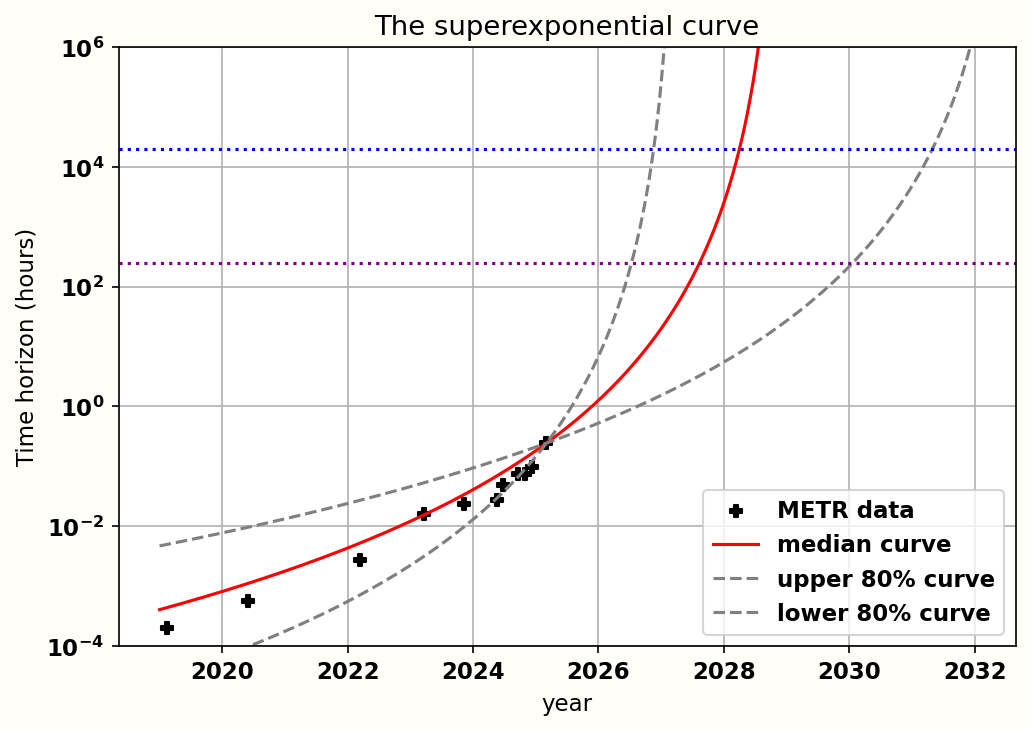

In [20]:

#hyperbolic curve

def modelhyp(x, H0,T0,r):
    
    #return np.log2(H0 * np.power(1 - (1-r)*(x-2025.17)/T0, 1/np.log2(r)))
    #return A * np.power((x-2019), 5)
    start = 2025.17
    return H0*np.power((1-(1-r)*((x-start)/T0)),(1/np.log2(r)))
    print()
    
    

startdate= 2019
enddate = 2032
#enddate = 2029.5
#enddate = 2025.4
x_fit = np.linspace(startdate, enddate, 100000)


r = 0.9
H0 = 878/3600
T0 = 0.375

y_fit = modelhyp(x_fit,H0,T0,r)
y_fitupper = modelhyp(x_fit,H0,2.5/12,r)
y_fitlower = modelhyp(x_fit,H0,9/12,r)



bg_rgb = "#FFFEF8"
fig, ax = plt.subplots(figsize=(7, 5), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")
ax.scatter(years, horizons, label="METR data",color = "black",marker="P")


ax.plot(x_fit, y_fit,color="red", label="median curve")
ax.plot(x_fit, y_fitupper,color="gray", label="upper 80% curve",linestyle = "--")
ax.plot(x_fit, y_fitlower,color="gray", label="lower 80% curve",linestyle = "--")


#ax.set_xticks(np.arange(startdate, enddate, 1))
#ax.set_yticks(np.arange(2019, 2030, 1))

ax.legend()
ax.set_xlabel("year")
ax.set_ylabel("Time horizon (hours)")
ax.set_yscale("log")
ax.set_title("The superexponential curve")
#ax.set_xticks(np.arange(startdate, enddate, 1))

plt.axhline(y=20040, color='b', linestyle=':', label='10 work years')
plt.axhline(y=250, color='purple', linestyle=':', label='1.5 work months')
plt.ylim((0.0001,1000000))


plt.tight_layout()
plt.show()

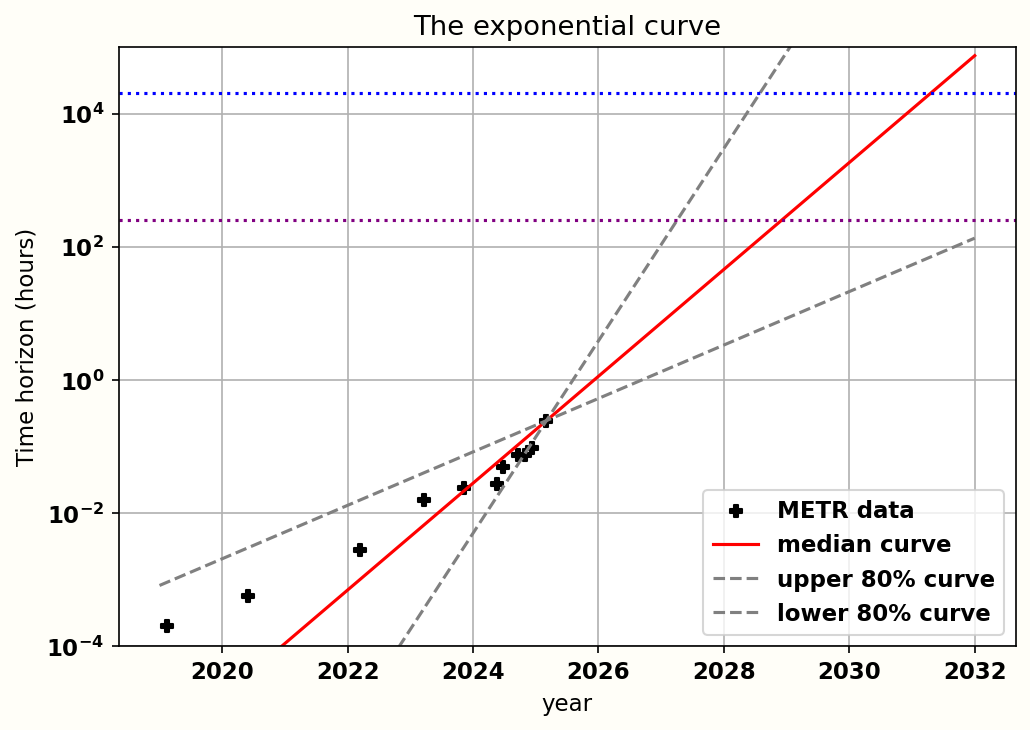

In [21]:

#Exponential curve

def modelexp(x,h0,T0):
    
    start = 2025.17
    x = x-start
    return h0*np.power(2, x/T0)
    #return A * np.power((x-2019), 5)
    

startdate= 2019
enddate = 2032
#enddate = 2029.5
#enddate = 2025.4
x_fit = np.linspace(startdate, enddate, 100000)



H0 = 878/3600
T0 = 0.375

y_fit = modelexp(x_fit,H0,T0)
y_fitupper = modelexp(x_fit,H0,2.5/12)
y_fitlower = modelexp(x_fit,H0,9/12)



bg_rgb = "#FFFEF8"
fig, ax = plt.subplots(figsize=(7, 5), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")
ax.scatter(years, horizons, label="METR data",color = "black",marker="P")

ax.plot(x_fit, y_fit,color="red", label="median curve")
ax.plot(x_fit, y_fitupper,color="gray", label="upper 80% curve",linestyle = "--")
ax.plot(x_fit, y_fitlower,color="gray", label="lower 80% curve",linestyle = "--")


#ax.set_xticks(np.arange(startdate, enddate, 1))
#ax.set_yticks(np.arange(2019, 2030, 1))

ax.legend()
ax.set_xlabel("year")
ax.set_ylabel("Time horizon (hours)")
ax.set_yscale("log")
ax.set_title("The exponential curve")
#ax.set_xticks(np.arange(startdate, enddate, 1))




plt.axhline(y=20040, color='b', linestyle=':', label='10 work years')
plt.axhline(y=250, color='purple', linestyle=':', label='1.5 work months')
plt.ylim((0.0001,100000))


plt.tight_layout()
plt.show()

<ipython-input-22-6c09526666bb>:16: RuntimeWarning: invalid value encountered in power
  return H0*np.power((1-(1-r)*((x-start)/T0)),(1/np.log2(r)))


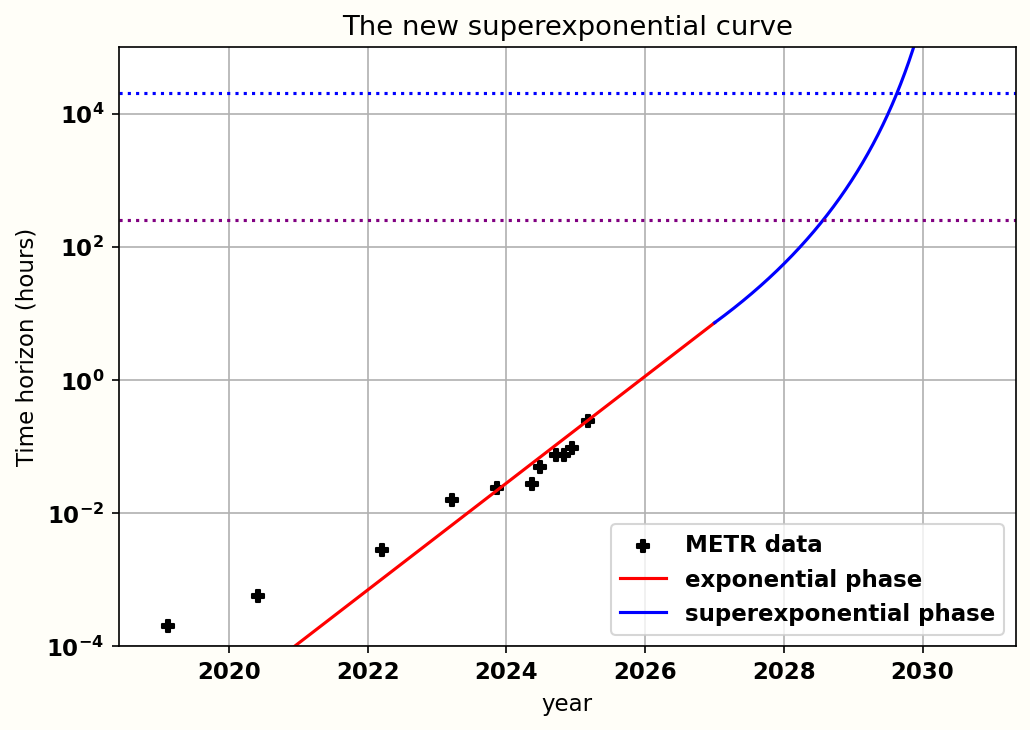

In [22]:

def modelexp(x,h0,T0):
    
    start = 2025.17
    x = x-start
    return h0*np.power(2, x/T0)
    #return A * np.power((x-2019), 5)
    
    
## with optimised fit

def modelhyp(x, H0,T0,r,t_switch):
    
    #return np.log2(H0 * np.power(1 - (1-r)*(x-2025.17)/T0, 1/np.log2(r)))
    #return A * np.power((x-2019), 5)
    start = 2025.17+t_switch
    return H0*np.power((1-(1-r)*((x-start)/T0)),(1/np.log2(r)))
    print()

def Pfcalchyp(T0,h0,r,hsc):

    n_doublings = np.log2(hsc/h0)
    total_time = T0*(1 - r**n_doublings) / (1 - r)
    return (total_time)

def Pfcalcexp(T0,h0,hsc):
    #4800 hours
    n_doublings = np.log2(hsc/h0)
    total_time = n_doublings*T0
    return (total_time)

startdate= 2019
enddate = 2032
#enddate = 2029.5
#enddate = 2025.4


start = 2025.17
H0 = 878/3600
T0 = 0.375



thresh_months = 0.045
#thresh_months =0.0014

hsc = 8*5*4*thresh_months

t_switch = Pfcalcexp(T0,H0,hsc)

x_fit1 = np.linspace(startdate, start+t_switch, 100000)
y_fit1 = modelexp(x_fit1,H0,T0)
    
r = 0.9
H0 = hsc 
T0 = 0.375

x_fit2 = np.linspace(start+t_switch, enddate, 100000)
y_fit2 = modelhyp(x_fit2,H0,T0,r,t_switch)



bg_rgb = "#FFFEF8"

fig, ax = plt.subplots(figsize=(7, 5), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")
ax.scatter(years, horizons, label="METR data",color = "black",marker="P")

ax.plot(x_fit1, y_fit1,color="red", label="exponential phase")
ax.plot(x_fit2, y_fit2,color="blue", label="superexponential phase")

#plt.plot(x_fit, y_fit, color="red", label="Fit: A*(C - x)^B")
#ax.set_xticks(np.arange(startdate, enddate, 1))
#ax.set_yticks(np.arange(2019, 2030, 1))


ax.legend()
ax.set_xlabel("year")
ax.set_ylabel("Time horizon (hours)")
ax.set_yscale("log")
ax.set_title("The new superexponential curve")
#ax.set_xticks(np.arange(startdate, enddate, 1))

plt.axhline(y=20040, color='b', linestyle=':', label='10 work years')
plt.axhline(y=250, color='purple', linestyle=':', label='1.5 work months')
plt.ylim((0.0001,100000))

#20040
#250

plt.tight_layout()
plt.show()

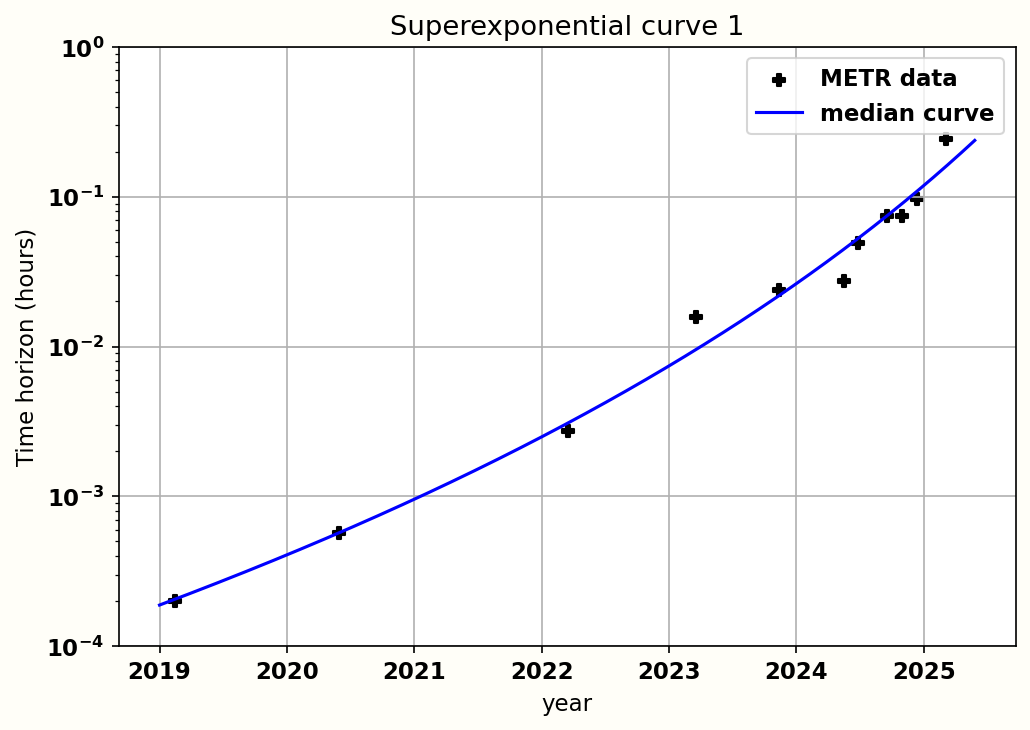

In [23]:

#OPTIMISED FIT SUPEREXP

def modelhyp(x, H0,T0,r):
    
    #return np.log2(H0 * np.power(1 - (1-r)*(x-2025.17)/T0, 1/np.log2(r)))
    #return A * np.power((x-2019), 5)
    start = 2025.17
    return H0*np.power((1-(1-r)*((x-start)/T0)),(1/np.log2(r)))
    

startdate= 2019
#enddate = 2032
#enddate = 2029.5
enddate = 2025.4
x_fit = np.linspace(startdate, enddate, 100000)


H0 = 570.3756/3600
T0 = 0.3855
r = 0.9162

y_fit = modelhyp(x_fit,H0,T0,r)


bg_rgb = "#FFFEF8"
fig, ax = plt.subplots(figsize=(7, 5), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")
ax.scatter(years, horizons, label="METR data",color = "black",marker="P")

ax.plot(x_fit, y_fit,color="blue", label="median curve")

ax.legend()
ax.set_xlabel("year")
ax.set_ylabel("Time horizon (hours)")
ax.set_yscale("log")
ax.set_title("Superexponential curve 1")

#ax.set_xticks(np.arange(startdate, enddate, 1))


plt.ylim((0.0001,1))


plt.tight_layout()
plt.show()

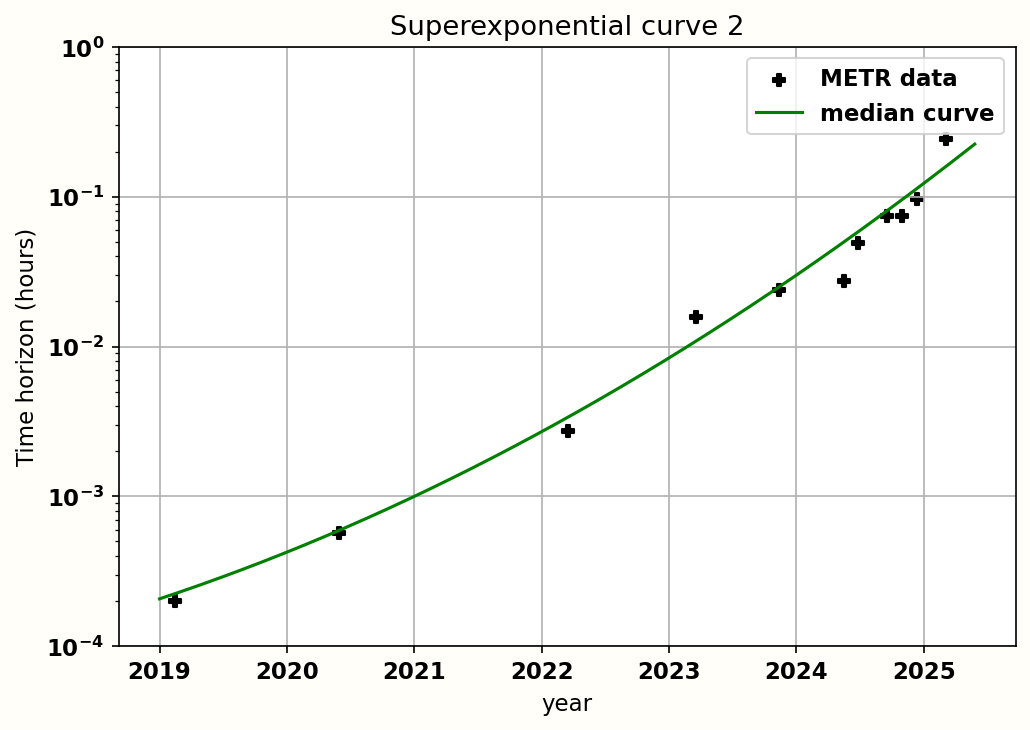

In [24]:

#OPTIMISED FIT quadexp

def modelquadexp(x, H0,T0,r):
    
    start = 2025.17
    x = x-start
    return h0*np.power(2, A*x**2+B*x)
    #return A * np.power((x-2019), 5)
    
def modelhyp(x, H0,T0,r):
    
    #return np.log2(H0 * np.power(1 - (1-r)*(x-2025.17)/T0, 1/np.log2(r)))
    #return A * np.power((x-2019), 5)
    start = 2025.17
    return H0*np.power((1-(1-r)*((x-start)/T0)),(1/np.log2(r)))
    

startdate= 2019
#enddate = 2032
#enddate = 2029.5
enddate = 2025.4
x_fit = np.linspace(startdate, enddate, 100000)


h0 = 570.3756/3600
A,B = 0.1,2.17

y_quadexp = modelquadexp(x_fit,A,B,h0)


bg_rgb = "#FFFEF8"
fig, ax = plt.subplots(figsize=(7, 5), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")
ax.scatter(years, horizons, label="METR data",color = "black",marker="P")

ax.plot(x_fit, y_quadexp,color="green", label="median curve")

ax.legend()
ax.set_xlabel("year")
ax.set_ylabel("Time horizon (hours)")
ax.set_yscale("log")
ax.set_title("Superexponential curve 2")

#ax.set_xticks(np.arange(startdate, enddate, 1))



plt.ylim((0.0001,1))


plt.tight_layout()
plt.show()

<ipython-input-25-6c45de99a08f>:15: RuntimeWarning: invalid value encountered in power
  return H0*np.power((1-(1-r)*((x-start)/T0)),(1/np.log2(r)))


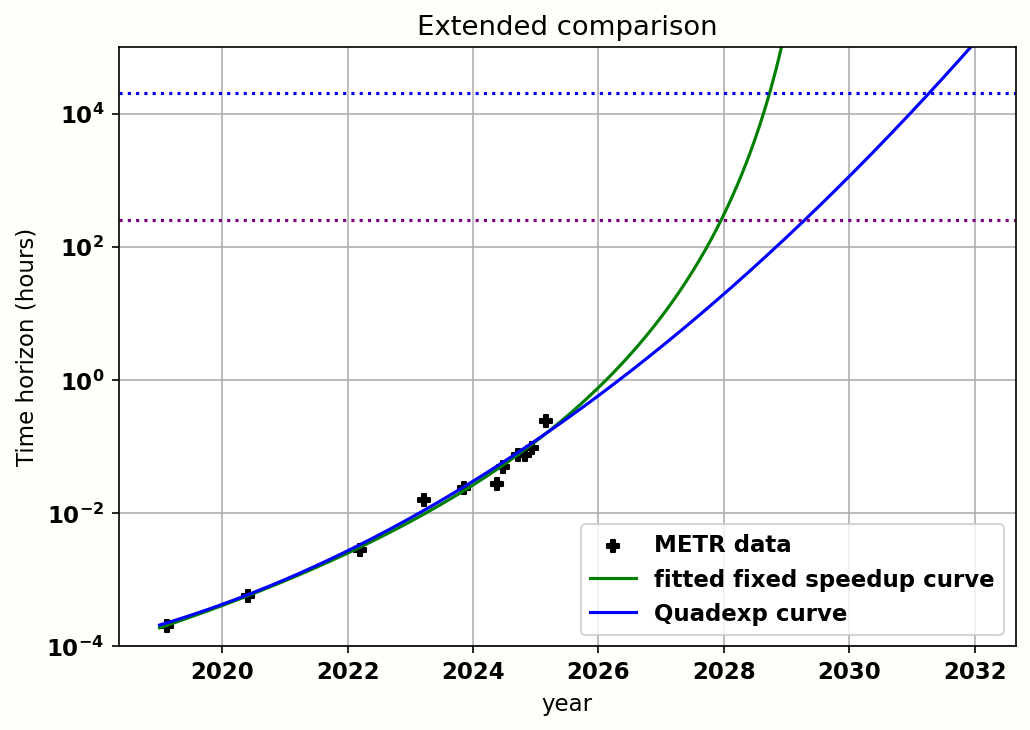

In [25]:

#OPTIMISED FIT quadexp

def modelquadexp(x, H0,T0,r):
    
    start = 2025.17
    x = x-start
    return h0*np.power(2, A*x**2+B*x)
    #return A * np.power((x-2019), 5)
    
def modelhyp(x, H0,T0,r):
    
    #return np.log2(H0 * np.power(1 - (1-r)*(x-2025.17)/T0, 1/np.log2(r)))
    #return A * np.power((x-2019), 5)
    start = 2025.17
    return H0*np.power((1-(1-r)*((x-start)/T0)),(1/np.log2(r)))

startdate= 2019
#enddate = 2032
enddate = 2032
#enddate = 2025.4
x_fit = np.linspace(startdate, enddate, 100000)


H0 = 570.3756/3600
T0 = 0.3855
r = 0.9162

y_hyp = modelhyp(x_fit,H0,T0,r)


h0 = 570.3756/3600
A,B = 0.1,2.17

y_quadexp = modelquadexp(x_fit,A,B,h0)


bg_rgb = "#FFFEF8"

fig, ax = plt.subplots(figsize=(7, 5), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")

ax.scatter(years, horizons, label="METR data",color = "black",marker="P")

ax.plot(x_fit, y_hyp,color="green", label="fitted fixed speedup curve")
ax.plot(x_fit, y_quadexp,color="blue", label="Quadexp curve")


ax.legend()
ax.set_xlabel("year")
ax.set_ylabel("Time horizon (hours)")
ax.set_yscale("log")
ax.set_title("Extended comparison")

#ax.set_xticks(np.arange(startdate, enddate, 1))

plt.axhline(y=20040, color='b', linestyle=':', label='10 work years')
plt.axhline(y=250, color='purple', linestyle=':', label='1.5 work months')

plt.ylim((0.0001,100000))


plt.tight_layout()
plt.show()

# 

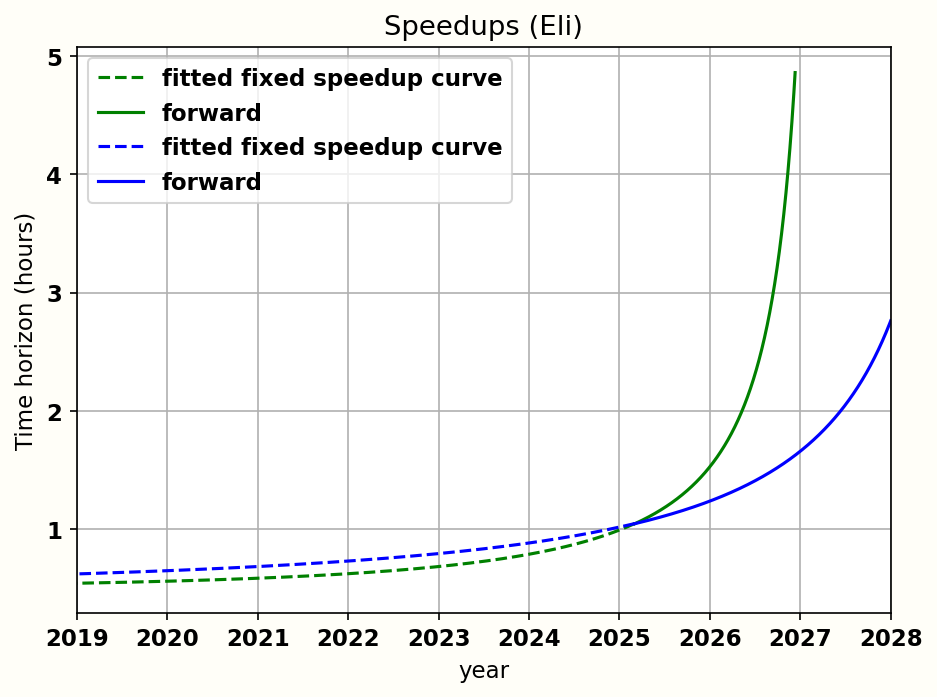

In [26]:
#eli


current_year = 2025.17

def Pfcalchyp(T0,h0,r,hsc):  # calculate time horizons gap for superexp curve

    n_doublings = np.log2(hsc/h0)
    total_time = T0*(1 - r**n_doublings) / (1 - r)
    return (total_time)

def Pfcalcexp(T0,h0,hsc):  # calculate time horizons gap for exponential curve
    #4800 hours
    n_doublings = np.log2(hsc/h0)
    total_time = n_doublings*T0
    return (total_time)

def sim(base_time_in_months):  #Speedups simulation forecast

    progs = []
    times = []
    velocities = []
    
    
    present_prog_multiplier = 0.0948  #actually one higher
    SC_prog_multiplier = 7.75  # actually one higher


    progress = 0.0
    time = 0
    dt = 1.0/30.5  # timestep is one day, calculation is in terms of months
    
    
    while progress < base_time_in_months:
# Calculate progress fraction
    
        progress_fraction = progress / base_time_in_months
               
               # Calculate algorithmic speedup based on intermediate speedup s(interpolate between present and SC rates)
        v_algorithmic = (1 + present_prog_multiplier) * ((1 + SC_prog_multiplier)/(1 + present_prog_multiplier)) ** progress_fraction
               # adjust algorithmic rate if human alg progress has decreased, in betweene
        total_rate = (v_algorithmic + 1) / 2
               
               # Update progress and time
        progress += dt * total_rate
        time += dt # Convert months to years
    
        progs.append(progress)
        times.append(time)
        velocities.append(total_rate)
    return(progs,times,velocities)


def simback(base_time_in_months): #Speedups simulation backcast

    progs = []
    times = []
    velocities = []
    
    current_year = 2025.17
    present_prog_multiplier = 0.0948  #actually one higher
    SC_prog_multiplier = 7.75  # actually one higher


    progress = 0.0
    time = 0
    dt = -1.0/30.5  # timestep is one day, calculation is in terms of months
    
    
    while progress > -base_time_in_months*2:
# Calculate progress fraction
    
        progress_fraction = progress / base_time_in_months
               
               # Calculate algorithmic speedup based on intermediate speedup s(interpolate between present and SC rates)
        v_algorithmic = (1 + present_prog_multiplier) * ((1 + SC_prog_multiplier)/(1 + present_prog_multiplier)) ** progress_fraction
               # adjust algorithmic rate if human alg progress has decreased, in betweene
        total_rate = (v_algorithmic + 1) / 2
               
               # Update progress and time
        progress += dt * total_rate
        time += dt # Convert months to years
    
        progs.append(progress)
        times.append(time)
        velocities.append(total_rate)
    return(progs,times,velocities)

r = 0.9
h0 = 878/3600
T0 = 0.375
hsc = 20040

extra_gap = 3.87  # 5 months
#


base_time_in_months= Pfcalchyp(T0,h0,r,hsc)*12 + extra_gap  # calculate gap  

progshypback,timeshypback,velocitieshypback = simback(base_time_in_months)
progshypfor,timeshypfor,velocitieshypfor = sim(base_time_in_months)



h0 = 878/3600
T0 = 0.375
hsc = 20040

extra_gap = 5
base_time_in_months= Pfcalcexp(T0,h0,hsc)*12 + extra_gap


progsexpback,timesexpback,velocitiesexpback = simback(base_time_in_months)
progsexpfor,timesexpfor,velocitiesexpfor = sim(base_time_in_months)

# PLOT
    
bg_rgb = "#FFFEF8"

fig, ax = plt.subplots(figsize=(7, 5), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")

#ax.scatter(years, horizons, label="METR data",color = "black",marker="P")

#ax.plot(x_fit, y_fit,color="green", label="median curve")



ax.plot(np.array(timeshypback)/12+current_year, velocitieshypback,color="green", label="fitted fixed speedup curve",linestyle='--')
ax.plot(np.array(timeshypfor)/12+current_year, velocitieshypfor,color="green", label="forward")

ax.plot(np.array(timesexpback)/12+current_year, velocitiesexpback,color="blue", label="fitted fixed speedup curve",linestyle='--')
ax.plot(np.array(timesexpfor)/12+current_year, velocitiesexpfor,color="blue", label="forward")


ax.legend()
ax.set_xlabel("year")
ax.set_ylabel("Time horizon (hours)")
#ax.set_yscale("log")
ax.set_title("Speedups (Eli)")


plt.xlim((2019,2028))

plt.show()





    

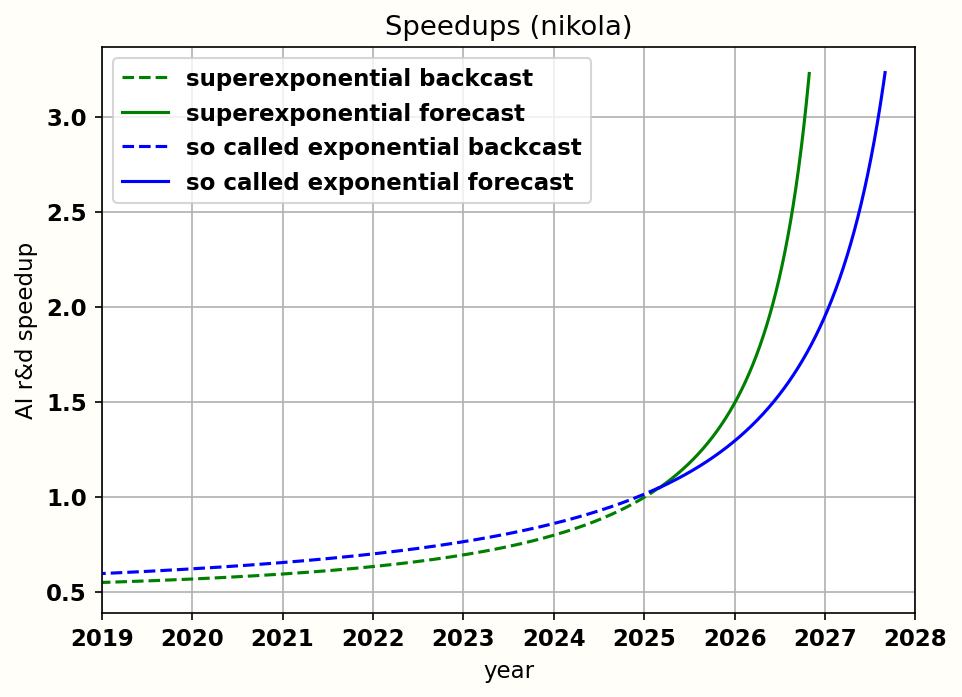

2021.8885792349727
0.6260044115282308


In [27]:

#Nikola

current_year = 2025.17

def Pfcalchyp(T0,h0,r,hsc):

    n_doublings = np.log2(hsc/h0)
    total_time = T0*(1 - r**n_doublings) / (1 - r)
    return (total_time)

def Pfcalcexp(T0,h0,hsc):
    #4800 hours
    n_doublings = np.log2(hsc/h0)
    total_time = n_doublings*T0
    return (total_time)

def sim(base_time_in_months):

    progs = []
    times = []
    velocities = []
    
    
    present_prog_multiplier = 0.0948  #actually one higher
    SC_prog_multiplier = 4.472  # actually one higher


    progress = 0.0
    time = 0
    dt = 1.0/30.5  # timestep is one day, calculation is in terms of months
    
    
    while progress < base_time_in_months:
# Calculate progress fraction
    
        progress_fraction = progress / base_time_in_months
               
               # Calculate algorithmic speedup based on intermediate speedup s(interpolate between present and SC rates)
        v_algorithmic = (1 + present_prog_multiplier) * ((1 + SC_prog_multiplier)/(1 + present_prog_multiplier)) ** progress_fraction
               # adjust algorithmic rate if human alg progress has decreased, in betweene
        total_rate = (v_algorithmic + 1) / 2
               
               # Update progress and time
        progress += dt * total_rate
        time += dt # Convert months to years
    
        progs.append(progress)
        times.append(time)
        velocities.append(total_rate)
    return(progs,times,velocities)


def simback(base_time_in_months):

    progs = []
    times = []
    velocities = []
    
    current_year = 2025.17
    present_prog_multiplier = 0.0948  #actually one higher
    SC_prog_multiplier = 4.472  # actually one higher
    #SC_prog_multiplier = 1  #what you need

    progress = 0.0
    time = 0
    dt = -1.0/30.5  # timestep is one day, calculation is in terms of months
    
    
    while progress > -base_time_in_months*2:
# Calculate progress fraction
    
        progress_fraction = progress / base_time_in_months
               
               # Calculate algorithmic speedup based on intermediate speedup s(interpolate between present and SC rates)
        v_algorithmic = (1 + present_prog_multiplier) * ((1 + SC_prog_multiplier)/(1 + present_prog_multiplier)) ** progress_fraction
               # adjust algorithmic rate if human alg progress has decreased, in betweene
        total_rate = (v_algorithmic + 1) / 2
        #total_rate =       v_algorithmic
               # Update progress and time
        progress += dt * total_rate
        time += dt # Convert months to years
    
        progs.append(progress)
        times.append(time)
        velocities.append(total_rate)
    return(progs,times,velocities)

r = 0.9
h0 = 878/3600
T0 = 0.375
hsc = 250 #####



extra_gap = 3.87

base_time_in_months= Pfcalchyp(T0,h0,r,hsc)*12 + extra_gap  # calculate gap  

progshypback,timeshypback,velocitieshypback = simback(base_time_in_months)
progshypfor,timeshypfor,velocitieshypfor = sim(base_time_in_months)



h0 = 878/3600
T0 = 0.375
hsc = 250   #######

extra_gap = 5
base_time_in_months= Pfcalcexp(T0,h0,hsc)*12 + extra_gap


progsexpback,timesexpback,velocitiesexpback = simback(base_time_in_months)
progsexpfor,timesexpfor,velocitiesexpfor = sim(base_time_in_months)

# PLOT
    
bg_rgb = "#FFFEF8"

fig, ax = plt.subplots(figsize=(7, 5), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")

#ax.scatter(years, horizons, label="METR data",color = "black",marker="P")

#ax.plot(x_fit, y_fit,color="green", label="median curve")



ax.plot(np.array(timeshypback)/12+current_year, velocitieshypback,color="green", label="superexponential backcast",linestyle='--')
ax.plot(np.array(timeshypfor)/12+current_year, velocitieshypfor,color="green", label="superexponential forecast")

ax.plot(np.array(timesexpback)/12+current_year, velocitiesexpback,color="blue", label="so called exponential backcast",linestyle='--')
ax.plot(np.array(timesexpfor)/12+current_year, velocitiesexpfor,color="blue", label="so called exponential forecast")




ax.legend()
ax.set_xlabel("year")
ax.set_ylabel("AI r&d speedup")
#ax.set_yscale("log")
ax.set_title("Speedups (nikola)")


plt.xlim((2019,2028))

plt.show()





print(timeshypback[1200]/12+current_year)
print(velocitieshypback[1200])






    

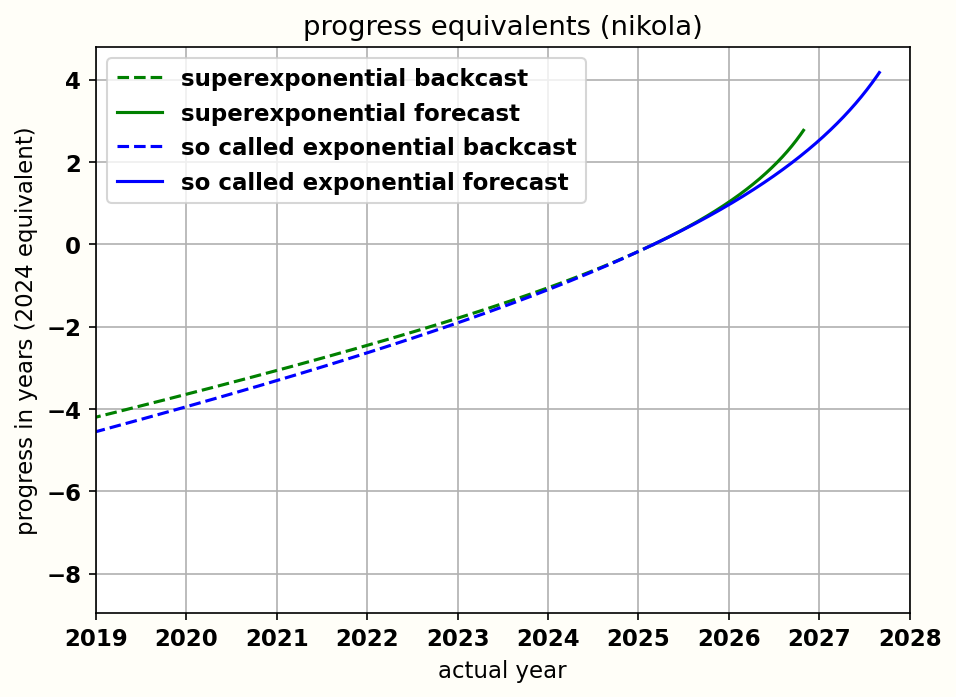

In [28]:

    
bg_rgb = "#FFFEF8"

fig, ax = plt.subplots(figsize=(7, 5), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")

ax.plot(np.array(timeshypback)/12+current_year, np.array(progshypback)/12,color="green", label="superexponential backcast",linestyle='--')
ax.plot(np.array(timeshypfor)/12+current_year, np.array(progshypfor)/12,color="green", label="superexponential forecast")

ax.plot(np.array(timesexpback)/12+current_year, np.array(progsexpback)/12,color="blue", label="so called exponential backcast",linestyle='--')
ax.plot(np.array(timesexpfor)/12+current_year, np.array(progsexpfor)/12,color="blue", label="so called exponential forecast")




ax.legend()
ax.set_xlabel("actual year")
ax.set_ylabel("progress in years (2024 equivalent)")
#ax.set_yscale("log")
ax.set_title("progress equivalents (nikola)")


plt.xlim((2019,2028))

plt.show()

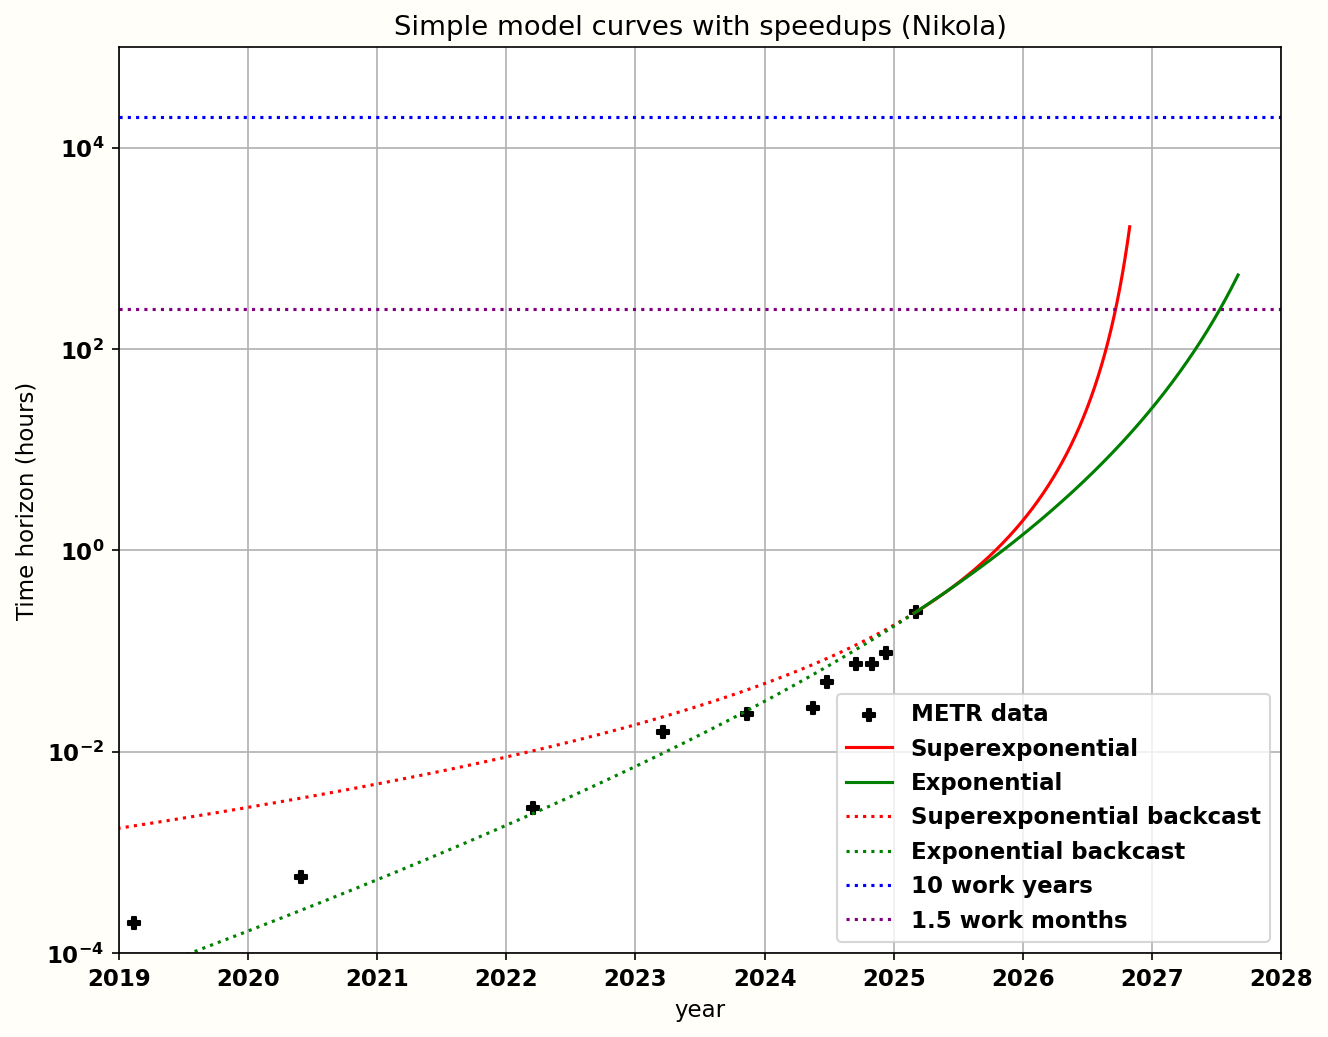

In [29]:
#Model comparison

start = 2025.170845

def model1(x, T0,h0):
    

    return h0*np.power(2, x/T0)
    #return A * np.power((x-2019), 5)
    
    
    
def model2(x, H0,T0,r):
    
    #return np.log2(H0 * np.power(1 - (1-r)*(x-2025.17)/T0, 1/np.log2(r)))
    #return A * np.power((x-2019), 5)
    #start = 2025.17
    return H0*np.power((1-(1-r)*(x/T0)),(1/np.log2(r)))


def Pfcalcexp(T0,h0,hsc):
    #4800 hours
    n_doublings = np.log2(hSC/h0)
    total_time = n_doublings*T0
    return (total_time)
    
def Pfcalchyp(T0,h0,r):

    n_doublings = np.log2(hSC/h0)
    total_time = T0*(1 - r**n_doublings) / (1 - r)
    return (total_time)
    
    
## with optimised fit



startdate= 2019
enddate = 2029
#enddate = 2031
#enddate = 2025.4
#x_fit = np.linspace(startdate, enddate, 100000)


# exponential curve

h0 = 878/3600
T0 = 0.375

x_exp = start+np.array(timesexpfor)/12
y_exp = model1(np.array(progsexpfor)/12,T0,h0)

x_expback = start+np.array(timesexpback)/12
y_expback = model1(np.array(progsexpback)/12,T0,h0)

# Hyperbolic curve

r = 0.9
H0 = 878/3600
T0 = 0.375

#h0,T0,r = 878,0.375,0.9

x_hyp = start+np.array(timeshypfor)/12
y_hyp = model2(np.array(progshypfor)/12,h0,T0,r)

x_hypback = start+np.array(timeshypback)/12
y_hypback = model2(np.array(progshypback)/12,h0,T0,r)


#gap_hyp = Pfcalchyp(T)


background_color = "#FFFEF8"
bg_rgb = "#FFFEF8"

fig, ax = plt.subplots(figsize=(10, 8), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")
ax.scatter(years, horizons, label="METR data",color = "black",marker="P")


ax.plot(x_hyp, y_hyp,color="red", label="Superexponential")
ax.plot(x_exp, y_exp,color="green", label="Exponential")

ax.plot(x_hypback, y_hypback,color="red", label="Superexponential backcast",linestyle=':')
ax.plot(x_expback, y_expback,color="green", label="Exponential backcast",linestyle=':')

#plt.plot(x_fit, y_fit, color="red", label="Fit: A*(C - x)^B")
#ax.set_xrange(2019,2028)
ax.set_xticks(np.arange(startdate, enddate, 1))

#ax.set_yticks(np.arange(2019, 2030, 1))
plt.axhline(y=20040, color='b', linestyle=':', label='10 work years')
plt.axhline(y=250, color='purple', linestyle=':', label='1.5 work months')


#ax.set_yrange(0.1,100)
#plt.yscale("log")
#ax.set_yscale("log")
ax.legend()

plt.ylim((0.0001,100000))
plt.xlim((2019,2028))
ax.set_xlabel("year")
ax.set_ylabel("Time horizon (hours)")
ax.set_yscale("log")
#axes1.set_yscale("log")
ax.set_title("Simple model curves with speedups (Nikola)")
plt.show()

<ipython-input-30-6ae579872610>:22: RuntimeWarning: invalid value encountered in power
  return H0*np.power((1-(1-r)*((x-start)/T0)),(1/np.log2(r)))


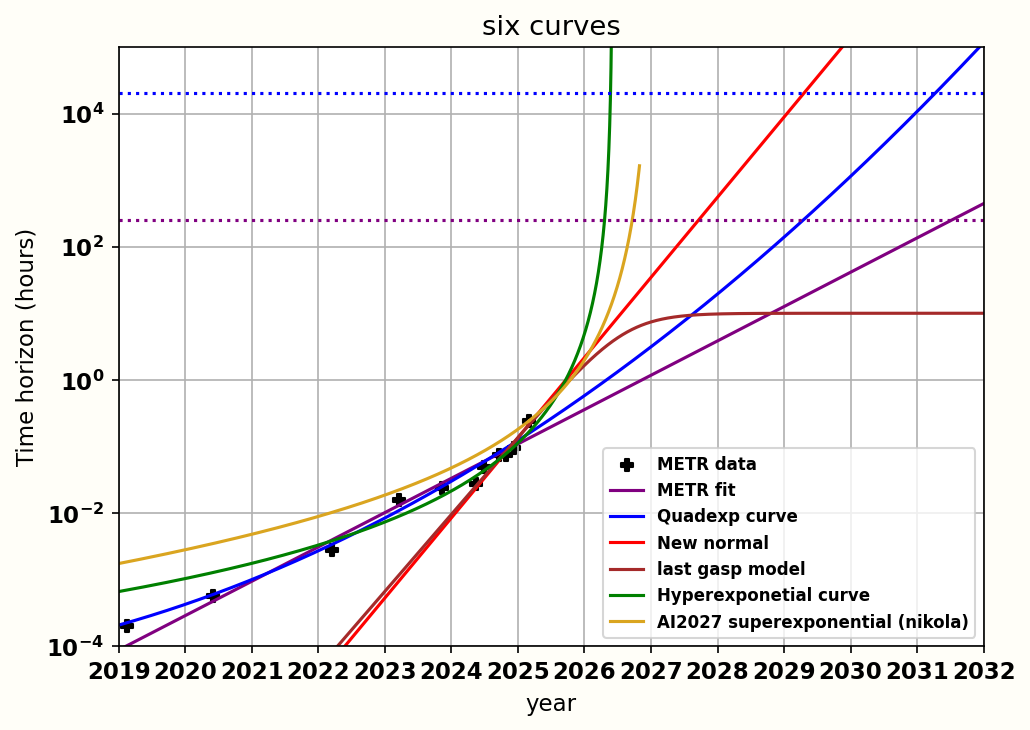

In [30]:

#OPTIMISED FIT quadexp

def modelquadexp(x, H0,T0,r):
    
    start = 2025.17
    x = x-start
    return h0*np.power(2, A*x**2+B*x)
    #return A * np.power((x-2019), 5)
    
def modelexp(x,h0,T0):
    
    start = 2025.17
    x = x-start
    return h0*np.power(2, x/T0)
    #return A * np.power((x-2019), 5)
    
def modelhyp(x, H0,T0,r):
    
    #return np.log2(H0 * np.power(1 - (1-r)*(x-2025.17)/T0, 1/np.log2(r)))
    #return A * np.power((x-2019), 5)
    start = 2025.17
    return H0*np.power((1-(1-r)*((x-start)/T0)),(1/np.log2(r)))

def modellog(x, L,k,x0):
    
    #return np.log2(H0 * np.power(1 - (1-r)*(x-2025.17)/T0, 1/np.log2(r)))
    #return A * np.power((x-2019), 5)
    start = 2025.17
    return L/(1+ np.exp(-k*(x-x0-start)))

def modellogadvanced(x, L,k,x0):
    
    #return np.log2(H0 * np.power(1 - (1-r)*(x-2025.17)/T0, 1/np.log2(r)))
    #return A * np.power((x-2019), 5)
    start = 2025.17
    return L/(1+ np.exp(-k*(x-x0-start)))


#def doubleexp(x,h01,T01,h02,T02,switchover):
#    
#    start = 2025.17
#    x = x-start
#    if x<switchover:
#        return h01*np.power(2, x/T01)
#    else:
#        return h02*np.power(2, x/T02)
#    #return A * np.power((x-2019), 5)


startdate= 2019
#enddate = 2032
enddate = 2038
#enddate = 2025.4
x_fit = np.linspace(startdate, enddate, 100000)


# hyperbolic

H0 = 10/60
T0 = 0.25
r = 0.8

y_hyper = modelhyp(x_fit,H0,T0,r)


# quadexp

h0 = 570.3756/3600
A,B = 0.1,2.17

y_quadexp = modelquadexp(x_fit,A,B,h0)

# Metrfit


METRfit = modelexp(x_fit,8/60,213/365)

# Newnormalfit

newnormal = modelexp(x_fit,13/60,0.25)

h0 = 8/60
T0 = 213/365
k = np.log(2)/T0
L = 4
x0 = (-T0/np.log(2))*np.log(h0/L)

Logisticmetr = modellog(x_fit, L,k,x0)

h01 = 8/60
T01 = 213/365
h02 = 8/60
T02 = 0.25

#Doubexpres = doubleexp(x_fit,h01,T01,h02,T02,2024)

#h0 = 8/60
#T0 = 213/365
#k = np.log(2)/T0
#L = 1/10
#x0 = (-T0/np.log(2))*np.log(h0/L)
#
#
#lastgasp = modellog(x_fit, L,k,x0)

h0 = 13/60
T0 = 0.26
k = np.log(2)/T0
L = 10
x0 = (-T0/np.log(2))*np.log(h0/L)

lastgasp = modellog(x_fit, L,k,x0)


bg_rgb = "#FFFEF8"

fig, ax = plt.subplots(figsize=(7, 5), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")
#ax.grid(which="minor")

ax.scatter(years, horizons, label="METR data",color = "black",marker="P")

ax.plot(x_fit, METRfit,color="purple", label="METR fit")
ax.plot(x_fit, y_quadexp,color="blue", label="Quadexp curve")
ax.plot(x_fit, newnormal,color="red", label="New normal")
ax.plot(x_fit, lastgasp,color="brown", label="last gasp model")
ax.plot(x_fit, y_hyper,color="green", label="Hyperexponetial curve")

ax.plot(x_hyp, y_hyp,color="goldenrod", label="AI2027 superexponential (nikola)")
ax.plot(x_hypback, y_hypback,color="goldenrod")


#ax.plot(x_fit, doublelog,color="yellow", label="logistic")




ax.legend(fontsize="8")
ax.set_xlabel("year")
ax.set_ylabel("Time horizon (hours)")
ax.set_yscale("log")
ax.set_title("six curves")

ax.set_xticks(np.arange(startdate, enddate, 1))

plt.axhline(y=20040, color='b', linestyle=':', label='10 work years')
plt.axhline(y=250, color='purple', linestyle=':', label='1.5 work months')

plt.ylim((0.0001,100000))
plt.xlim((2019,2032))

#hyperexp: mid 2026 ,mid 2026
#AI futures: end of 2026,mid 2026
# new normal: mid 2029,end of 2027
#quadexp: mid 2031,mid 2029
# metr: mid 2035,mid 2031
#

plt.tight_layout()
plt.show()

C:\Users\timto\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
C:\Users\timto\anaconda3\lib\site-packages\ipykernel_launcher.py:95: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\timto\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


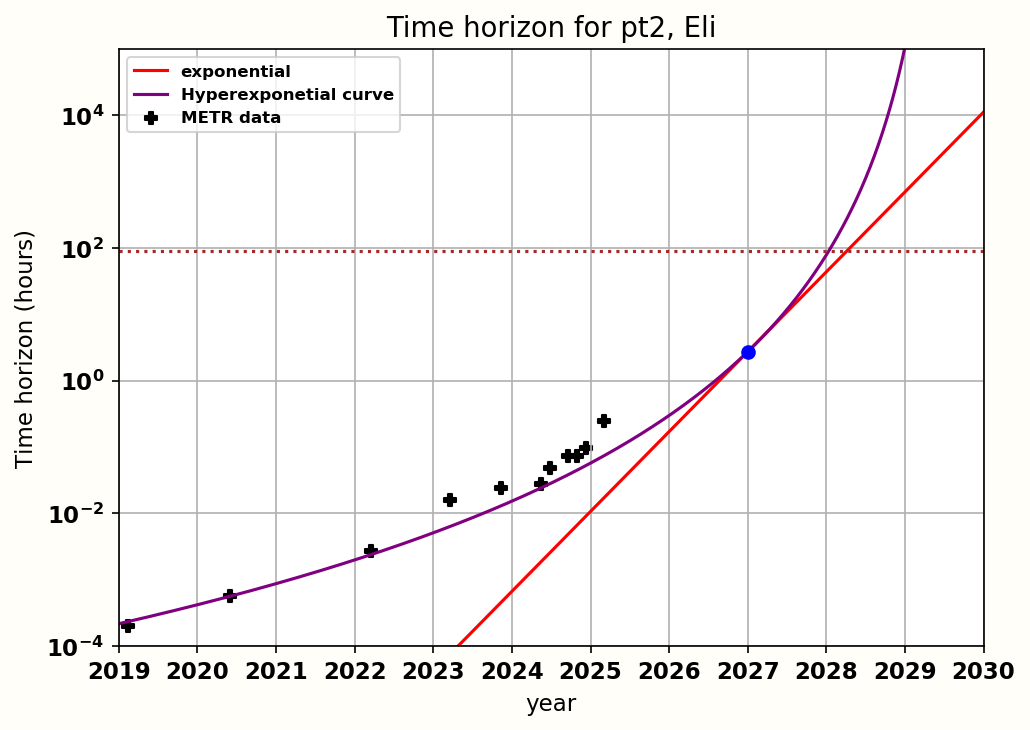

In [4]:

#benchmark and gaps eli (no speedups)


    
def modelexp(x,h0,T0,Tsat):
    
    start = 2025.17+Tsat
    x = x-start
    return h0*np.power(2, x/T0)
    #return A * np.power((x-2019), 5)
    
def modelhyp(x, H0,T0,r,Tsat):
    
    #return np.log2(H0 * np.power(1 - (1-r)*(x-2025.17)/T0, 1/np.log2(r)))
    #return A * np.power((x-2019), 5)
    
    start = 2025.17+Tsat
    return H0*np.power((1-(1-r)*((x-start)/T0)),(1/np.log2(r)))

#2.7386 hours for H0
#2025.75
#to
#2031
#
#3 months T_T
#0.25 years

startdate= 2019
#enddate = 2032
enddate = 2038
#enddate = 2025.4
x_fit = np.linspace(startdate, enddate, 100000)

Tsat = 1.83
# hyperbolic

H0 = 2.7386
T0 = 0.25
r = 0.9

part2hyp = modelhyp(x_fit,H0,T0,r,Tsat)



# Newnormalfit
H0 = 2.7386
T0 = 0.25
part2exp = modelexp(x_fit,H0,T0,Tsat)


start = 2025.17+Tsat


bg_rgb = "#FFFEF8"

fig, ax = plt.subplots(figsize=(7, 5), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")
#ax.grid(which="minor")

ax.scatter(years, horizons, label="METR data",color = "black",marker="P")


ax.plot(x_fit, part2exp,color="red", label="exponential")
ax.plot(x_fit, part2hyp,color="purple", label="Hyperexponetial curve")
ax.plot(start, H0, 'bo')


#ax.plot(x_fit, doublelog,color="yellow", label="logistic")



ax.legend(fontsize="8")
ax.set_xlabel("year")
ax.set_ylabel("Time horizon (hours)")
ax.set_yscale("log")
ax.set_title("Time horizon for pt2, Eli")

ax.set_xticks(np.arange(startdate, enddate, 1))


plt.axhline(y=91.469, color='brown', linestyle=':', label='0.55 work months')



plt.ylim((0.0001,100000))
plt.xlim((2019,2030))

#hyperexp: mid 2026 ,mid 2026
#AI futures: end of 2026,mid 2026
# new normal: mid 2029,end of 2027
#quadexp: mid 2031,mid 2029
# metr: mid 2035,mid 2031
#

plt.tight_layout()
plt.show()

C:\Users\timto\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power
C:\Users\timto\anaconda3\lib\site-packages\ipykernel_launcher.py:94: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\timto\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


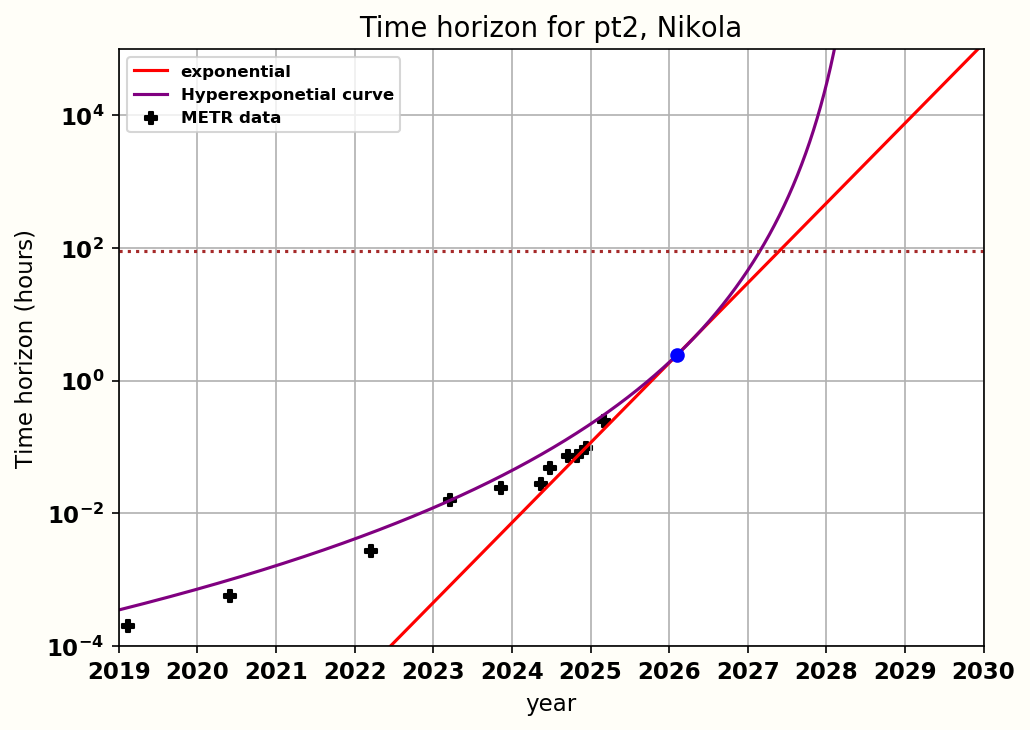

In [3]:

#benchmark and gaps nikola (no speedups)


#2025-08-01", "2026-11-01

    
def modelexp(x,h0,T0,Tsat):
    
    start = 2025.17+Tsat
    x = x-start
    return h0*np.power(2, x/T0)
    #return A * np.power((x-2019), 5)
    
def modelhyp(x, H0,T0,r,Tsat):
    
    #return np.log2(H0 * np.power(1 - (1-r)*(x-2025.17)/T0, 1/np.log2(r)))
    #return A * np.power((x-2019), 5)
    
    start = 2025.17+Tsat
    return H0*np.power((1-(1-r)*((x-start)/T0)),(1/np.log2(r)))

#2.7386 hours for H0

#
#"2025-08-01", "2026-11-01"
#0.25 years

#2025.66666667

startdate= 2019
#enddate = 2032
enddate = 2038
#enddate = 2025.4 to 2026.91  geom mean 2026.15
x_fit = np.linspace(startdate, enddate, 100000)

Tsat = 0.93
# hyperbolic
H0 = 2.449
T0 = 0.25
r = 0.9

part2hyp = modelhyp(x_fit,H0,T0,r,Tsat)



# Newnormalfit
H0 = 2.449
T0 = 0.25
part2exp = modelexp(x_fit,H0,T0,Tsat)


start = 2025.17+Tsat

bg_rgb = "#FFFEF8"

fig, ax = plt.subplots(figsize=(7, 5), dpi=150, facecolor=bg_rgb)
ax.grid(which="major")
#ax.grid(which="minor")

ax.scatter(years, horizons, label="METR data",color = "black",marker="P")


ax.plot(x_fit, part2exp,color="red", label="exponential")
ax.plot(x_fit, part2hyp,color="purple", label="Hyperexponetial curve")
ax.plot(start, 2.449, 'bo')

#ax.plot(x_fit, doublelog,color="yellow", label="logistic")



ax.legend(fontsize="8")
ax.set_xlabel("year")
ax.set_ylabel("Time horizon (hours)")
ax.set_yscale("log")
ax.set_title("Time horizon for pt2, Nikola")

ax.set_xticks(np.arange(startdate, enddate, 1))


plt.axhline(y=91.469, color='brown', linestyle=':', label='0.55 work months')



plt.ylim((0.0001,100000))
plt.xlim((2019,2030))

#hyperexp: mid 2026 ,mid 2026
#AI futures: end of 2026,mid 2026
# new normal: mid 2029,end of 2027
#quadexp: mid 2031,mid 2029
# metr: mid 2035,mid 2031
#

plt.tight_layout()
plt.show()